In [134]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

In [135]:
#importando dataset de consumo de cerveja
df = pd.read_csv('Datasets/beer.csv')

#Removendo registro do mês
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index(df['Month'])
df = df.drop(columns=['Month'])

#renomeando coluna "Monthly beer production"
df = df.rename(columns={'Monthly beer production':'Beer'})

df.head()

,Beer
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


### Visualizando dataset

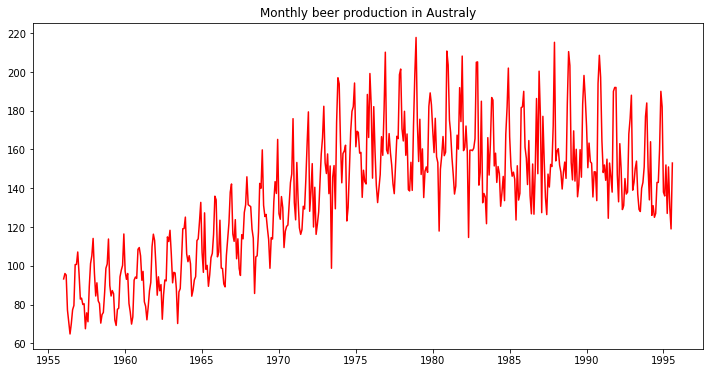

In [136]:
plt.figure(figsize=(12,6))

plt.plot(df['Beer'], label='Beer production', color='red')

plt.title('Monthly beer production in Australy')

plt.show()

### Movendo valores em uma posição para ser a variável alvo

In [137]:
#df['Beer + 1'] = df['Beer'].shift(-1)
df['Target'] = df['Beer'].shift(-2)
df = df.dropna()

df.head()

,Beer,Target
Month,,
1956-01-01,93.2,95.2
1956-02-01,96.0,77.1
1956-03-01,95.2,70.9
1956-04-01,77.1,64.8
1956-05-01,70.9,70.1


In [138]:
real = df['Beer']
target = df['Target']

### Separando treino e teste

In [146]:
train_size = int(len(df)*0.75)
train = df[:train_size]
test = df[train_size:]

X_train, X_test = train['Beer'].to_numpy().reshape(-1,1), test['Beer'].to_numpy().reshape(-1,1)
y_train, y_test = train['Target'].to_numpy().reshape(-1,1), test['Target'].to_numpy()

### Criando modelo de regressão linear

In [140]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr_fit = lr.fit(X_train, y_train)

In [141]:
lr_pred = lr_fit.predict(X_test)

In [142]:
df_res = pd.DataFrame()
df_res['Real'] = y_test
df_res['Pred'] = lr_pred
df_res = df_res.set_index(df.index[train_size:])

In [143]:
df_res.head()

,Real,Pred
Month,,
1985-08-01,181.6,133.309514
1985-09-01,182.0,136.059584
1985-10-01,190.0,170.789044
1985-11-01,161.2,171.103338
1985-12-01,155.5,177.389213


In [147]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(df_res['Real'], df_res['Pred']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.802


In [148]:
lr_sc = lr.score(X_test, y_test.reshape(-1,1))

In [149]:
lr_sc

-0.49303350596973017

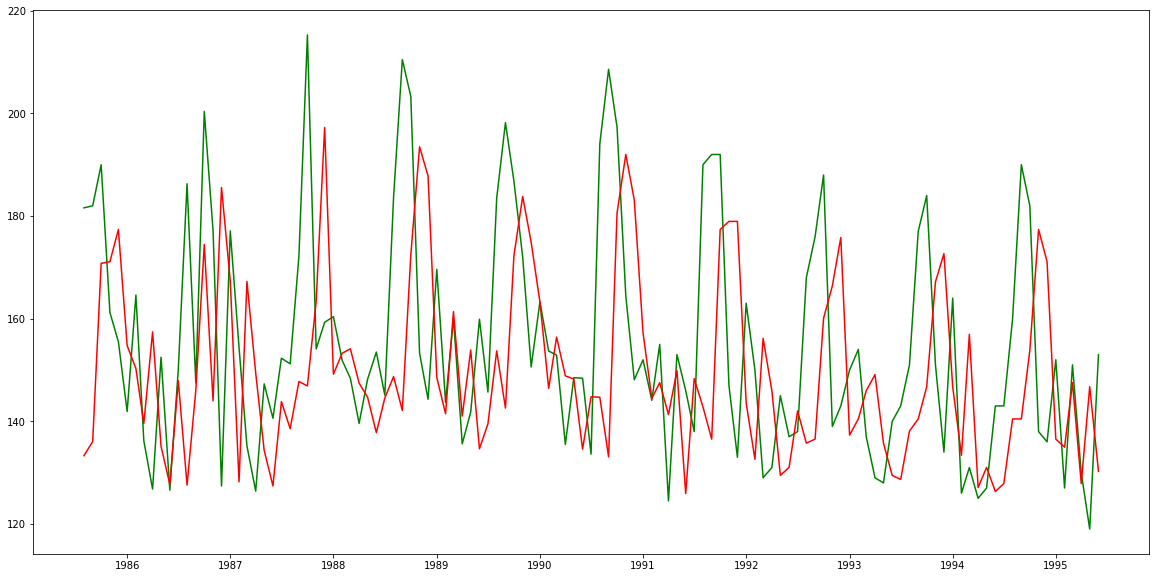

In [128]:
plt.figure(figsize=(20,10))

#plt.plot(df['Beer'][:train_size], color='blue')
plt.plot(df_res['Real'], color='green')
plt.plot(df_res['Pred'], color='red')

plt.show()

In [129]:
X_train

array([[ 93.2],
       [ 96. ],
       [ 95.2],
       [ 77.1],
       [ 70.9],
       [ 64.8],
       [ 70.1],
       [ 77.3],
       [ 79.5],
       [100.6],
       [100.7],
       [107.1],
       [ 95.9],
       [ 82.8],
       [ 83.3],
       [ 80. ],
       [ 80.4],
       [ 67.5],
       [ 75.7],
       [ 71.1],
       [ 89.3],
       [101.1],
       [105.2],
       [114.1],
       [ 96.3],
       [ 84.4],
       [ 91.2],
       [ 81.9],
       [ 80.5],
       [ 70.4],
       [ 74.8],
       [ 75.9],
       [ 86.3],
       [ 98.7],
       [100.9],
       [113.8],
       [ 89.8],
       [ 84.4],
       [ 87.2],
       [ 85.6],
       [ 72. ],
       [ 69.2],
       [ 77.5],
       [ 78.1],
       [ 94.3],
       [ 97.7],
       [100.2],
       [116.4],
       [ 97.1],
       [ 93. ],
       [ 96. ],
       [ 80.5],
       [ 76.1],
       [ 69.9],
       [ 73.6],
       [ 92.6],
       [ 94.2],
       [ 93.5],
       [108.5],
       [109.4],
       [105.1],
       [ 92.5],
       [